In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
population = pd.read_csv("country_population.csv")
hdi = pd.read_csv("human_development.csv")
hist = pd.read_csv("historical_index_with_growth.csv")

In [4]:
merge1 = pd.merge(hdi, population, on="Country")
imp = hist[["Country", "Average Growth (Percent), 1990-2000 and 2000-2014"]]

In [5]:
merge2 = pd.merge(merge1, imp, on="Country")
merge2[0:5]

,HDI Rank,Country,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank,Pos,Population,"Average Growth (Percent), 1990-2000 and 2000-2014"
0,1.0,Norway,0.94,81.6,17.5,12.6,64992.0,5.0,121,5207689,1.466855
1,2.0,Australia,0.94,82.4,20.2,13.0,42261.0,17.0,56,22751014,2.046199
2,3.0,Switzerland,0.93,83.0,15.8,12.8,56431.0,6.0,97,8121830,2.351702
3,4.0,Denmark,0.92,80.2,18.7,12.7,44025.0,11.0,116,5581503,3.494205
4,5.0,Netherlands,0.92,81.6,17.9,11.9,45435.0,9.0,67,16947904,2.539473


In [6]:
#merge2 = merge2.drop("Human Development Index (HDI)", 1)
merge2 = merge2.drop("Pos", 1)
merge2[0:5]

,HDI Rank,Country,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank,Population,"Average Growth (Percent), 1990-2000 and 2000-2014"
0,1.0,Norway,0.94,81.6,17.5,12.6,64992.0,5.0,5207689,1.466855
1,2.0,Australia,0.94,82.4,20.2,13.0,42261.0,17.0,22751014,2.046199
2,3.0,Switzerland,0.93,83.0,15.8,12.8,56431.0,6.0,8121830,2.351702
3,4.0,Denmark,0.92,80.2,18.7,12.7,44025.0,11.0,5581503,3.494205
4,5.0,Netherlands,0.92,81.6,17.9,11.9,45435.0,9.0,16947904,2.539473


In [7]:
len(merge2)

121

In [8]:
feature_columns = ["Life Expectancy at Birth", "Expected Years of Education", "Mean Years of Education", \
                  "Gross National Income (GNI) per Capita", "GNI per Capita Rank Minus HDI Rank", \
                  "Population", "Average Growth (Percent), 1990-2000 and 2000-2014"]
features_df = merge2[feature_columns]
features = features_df.as_matrix()
target_df = merge2["Human Development Index (HDI)"]
target = target_df.as_matrix()

In [9]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [10]:
from sklearn import linear_model, tree
from sklearn.metrics import mean_squared_error
import numpy as np

def showRegression(model, regressionType, features_train, target_train, features_test, target_test):
    model.fit(features_train,target_train)
    predictions= model.predict(features_test)
    print(regressionType)
    mseScores[regressionType]= np.sqrt(mean_squared_error(target_test,predictions))
    print("MSE: ", np.sqrt(mean_squared_error(target_test,predictions)))

    plt.figure(figsize=(8,6))
    plt.plot([0.0,1.0],[0.0,1.0],"-",linewidth=2,c="r")
    plt.plot(target_test,predictions,"o",markersize=5,alpha=0.2,c="b")
    plt.xlabel("actual Human development index")
    plt.ylabel("predicted human development index")

mseScores = {}

Linear Regression
('MSE: ', 0.01259816301272809)


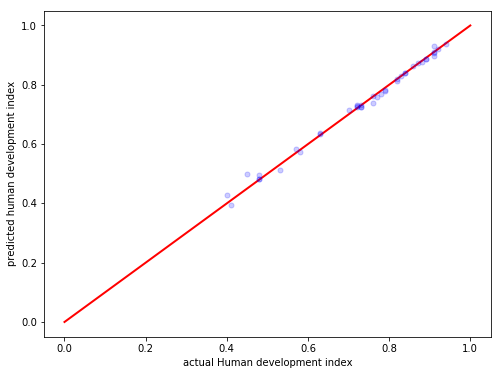

In [11]:
model= linear_model.LinearRegression()
showRegression(model, "Linear Regression", features_train,target_train, features_test, target_test)

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

def naive_bayes_gnb(features_train,target_train, features_test, target_test):
    gnb = GaussianNB()
    gnb.fit(features_train,target_train)
    prediction_gnb = gnb.predict(features_test)
    cm = metrics.confusion_matrix(target_test, prediction_gnb)
    print cm
    total = 0
    diag = 0
    for j in range(len(cm)):
        curr = cm[j]
        for k in range(len(curr)):
            total += curr[k]
            if j == k:
                diag += curr[k]
    accuracy = float(diag) / float(total)
    print "accuracy :", accuracy

In [13]:
# change up the rank idea
curr = 0.9
counter = 1
rank = []
index = merge2["Human Development Index (HDI)"]
for i in range(len(merge2)): 
    if index[i] >= curr: 
        rank.append(counter)
    else: 
        counter +=1
        curr -= 0.1
        rank.append(counter)
rank_df = pd.DataFrame(rank)
rank_df.columns = ["Labels"]
rank_df

,Labels
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [14]:
len(merge2)

121

In [15]:
nb_merge = pd.concat([merge2, rank_df], axis=1)
nb_merge

,HDI Rank,Country,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank,Population,"Average Growth (Percent), 1990-2000 and 2000-2014",Labels
0,1.0,Norway,0.94,81.6,17.5,12.6,64992.0,5.0,5207689,1.466855,1
1,2.0,Australia,0.94,82.4,20.2,13.0,42261.0,17.0,22751014,2.046199,1
2,3.0,Switzerland,0.93,83.0,15.8,12.8,56431.0,6.0,8121830,2.351702,1
3,4.0,Denmark,0.92,80.2,18.7,12.7,44025.0,11.0,5581503,3.494205,1
4,5.0,Netherlands,0.92,81.6,17.9,11.9,45435.0,9.0,16947904,2.539473,1
5,6.0,Germany,0.92,80.9,16.5,13.1,43919.0,11.0,80854408,3.534333,1
6,6.0,Ireland,0.92,80.9,18.6,12.2,39568.0,16.0,4892305,3.169913,1
7,8.0,United States,0.92,79.1,16.5,12.9,52947.0,3.0,321368864,1.802287,1
8,9.0,Canada,0.91,82.0,15.9,13.0,42155.0,11.0,35099836,2.629834,1
9,9.0,New Zealand,0.91,81.8,19.2,12.5,32689.0,23.0,4438393,2.215444,1


In [16]:
feature2_columns = ["Life Expectancy at Birth", "Expected Years of Education", "Mean Years of Education", \
                  "Gross National Income (GNI) per Capita", "GNI per Capita Rank Minus HDI Rank", \
                  "Population", "Average Growth (Percent), 1990-2000 and 2000-2014"]
features2_df = nb_merge[feature_columns]
features2 = features2_df.as_matrix()
labels_df = nb_merge["Labels"]
labels = labels_df.as_matrix()

In [17]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features2, labels, test_size=0.33, random_state=42)
naive_bayes_gnb(features_train, labels_train, features_test, labels_test)

[[ 0  6  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  5  1  0  2  4  0]
 [ 0  1  0  0  1  1  0]
 [ 0  0  0  1  1  1  0]
 [ 0  0  0  0  1  4  0]
 [ 0  0  0  0  0  1  0]]
accuracy : 0.4


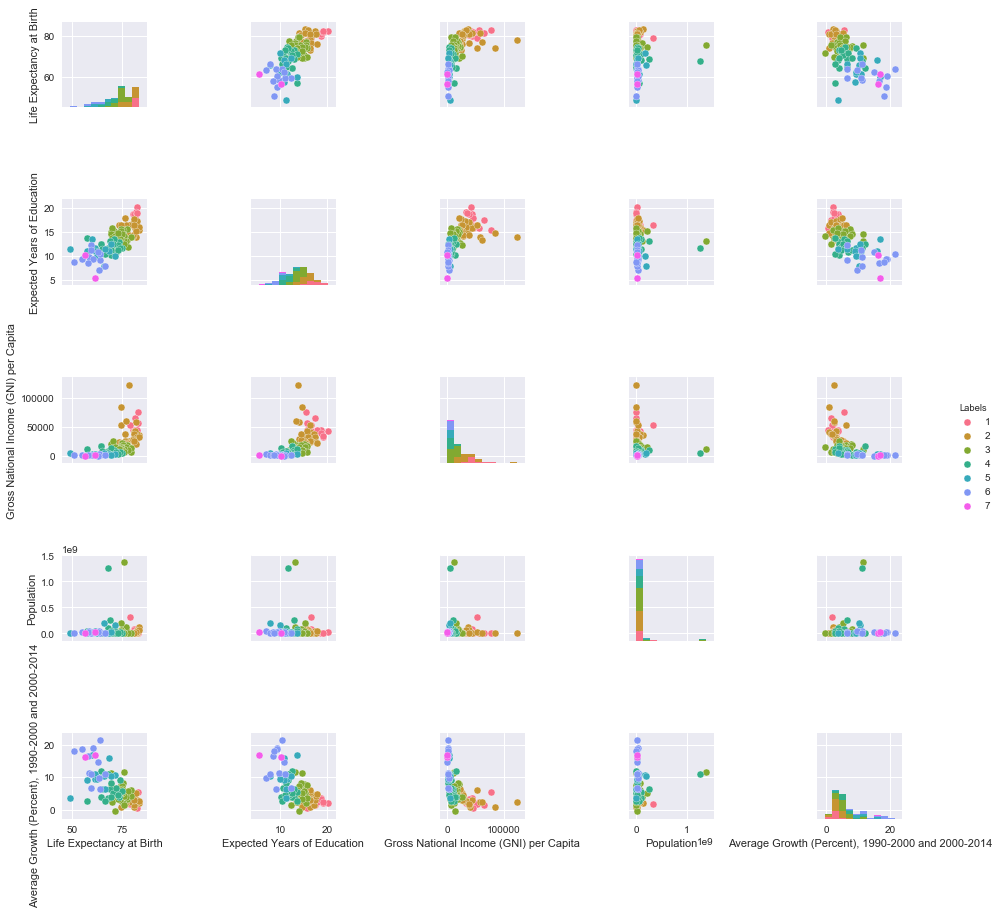

In [19]:
import seaborn as sns
sns.set(font="Droid Sans",font_scale = 1)
sns.set_style("darkgrid")
sns.pairplot(nb_merge, vars=["Life Expectancy at Birth", "Expected Years of Education", \
                  "Gross National Income (GNI) per Capita", \
                  "Population", "Average Growth (Percent), 1990-2000 and 2000-2014"], hue="Labels")

In [34]:
new = nb_merge.copy()
# india = 94, china = 66

new = new.drop(new.index[94])
new = new.drop(new.index[66])
new

,HDI Rank,Country,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank,Population,"Average Growth (Percent), 1990-2000 and 2000-2014",Labels
0,1.0,Norway,0.94,81.6,17.5,12.6,64992.0,5.0,5207689,1.466855,1
1,2.0,Australia,0.94,82.4,20.2,13.0,42261.0,17.0,22751014,2.046199,1
2,3.0,Switzerland,0.93,83.0,15.8,12.8,56431.0,6.0,8121830,2.351702,1
3,4.0,Denmark,0.92,80.2,18.7,12.7,44025.0,11.0,5581503,3.494205,1
4,5.0,Netherlands,0.92,81.6,17.9,11.9,45435.0,9.0,16947904,2.539473,1
5,6.0,Germany,0.92,80.9,16.5,13.1,43919.0,11.0,80854408,3.534333,1
6,6.0,Ireland,0.92,80.9,18.6,12.2,39568.0,16.0,4892305,3.169913,1
7,8.0,United States,0.92,79.1,16.5,12.9,52947.0,3.0,321368864,1.802287,1
8,9.0,Canada,0.91,82.0,15.9,13.0,42155.0,11.0,35099836,2.629834,1
9,9.0,New Zealand,0.91,81.8,19.2,12.5,32689.0,23.0,4438393,2.215444,1


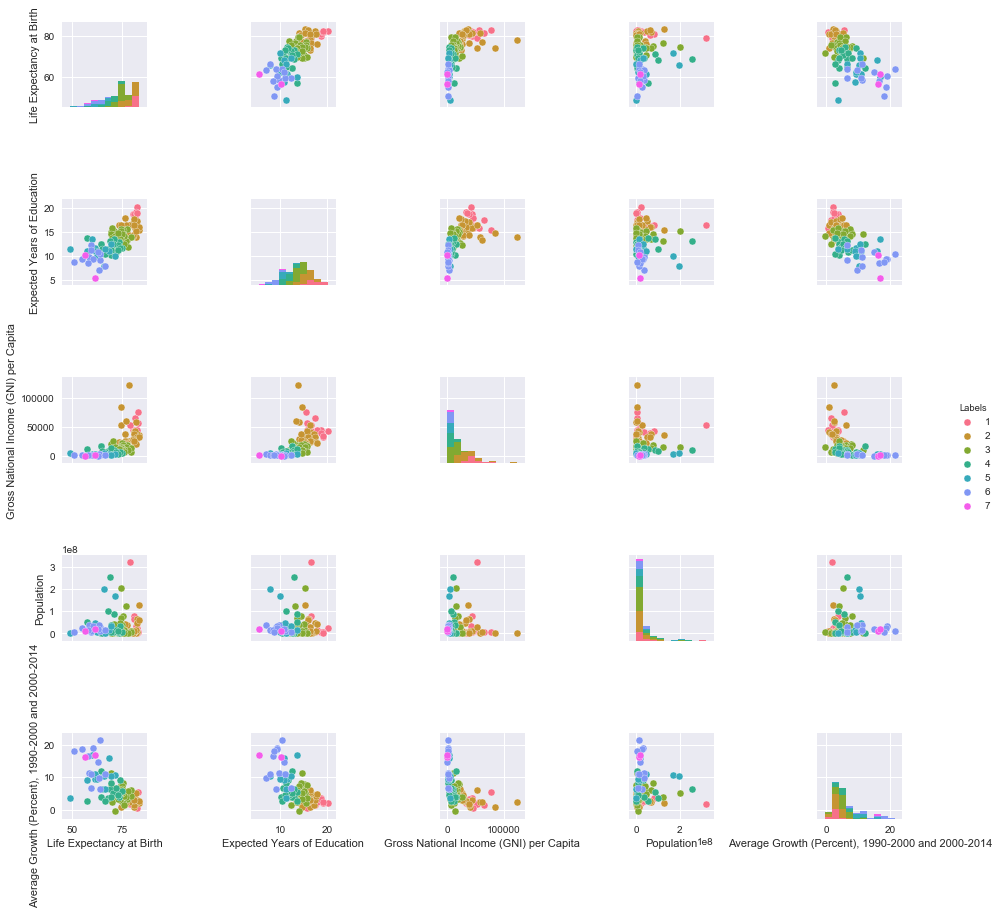

In [35]:
sns.set(font="Droid Sans",font_scale = 1)
sns.set_style("darkgrid")
sns.pairplot(new, vars=["Life Expectancy at Birth", "Expected Years of Education", \
                  "Gross National Income (GNI) per Capita", \
                  "Population", "Average Growth (Percent), 1990-2000 and 2000-2014"], hue="Labels")

In [40]:
new.rename(columns = {'Average Growth (Percent), 1990-2000 and 2000-2014': 'Average Growth'}, inplace=True)

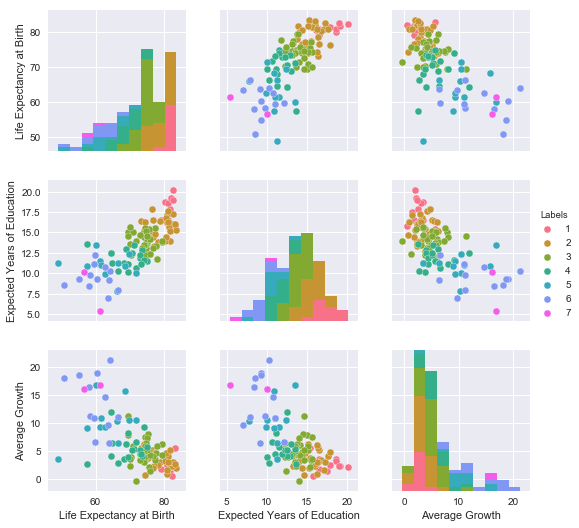

In [41]:
sns.set(font="Droid Sans",font_scale = 1)
sns.set_style("darkgrid")
sns.pairplot(new, vars=["Life Expectancy at Birth", "Expected Years of Education", \
                   "Average Growth"], hue="Labels")